In [8]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph, Graph
from itertools import product

## 6.5 Computationally motivated compact representations

Obviously many games can be condensed and distilled, often in ways which make finding equilibria easier. For example, consider any board game. There are several different things we can look at in this area.

### 6.5.1 The expected utility problem

Given a game, a mixed strategy profile, and a player, we often want to know what their expected utility will be. In a normal-form game the answer is given by:

$$\sum_{a\in A}u_i(a)\prod_{j=1}^ns_j(a_j)$$

I.e., a mixture of the outcomes weighed by the probability given by each player's strategy.

Unfortunately this grows exponentially in the number of actions and the number of players. Fortunately in the normal-form version of the game we already have the table computed, and so it's fairly trivial. However, if we do some compression / smaller representation of the game this benefit goes away. We ideally want to avoid turning our representation into the full normal-form.

There are ways to compress the information about payoffs, but the challenge is how to make sure that compression can be used to get expected utility in an efficient manner.

### 6.5.2 Polynomial type

A game has a polynomial type if the number of agents and the size of the action sets are polynomially bounded in the size of the representation. Most games so far in normal form have looked like this. As an example of a game which is not polynomially bounded consider a game where players can choose who to form a group with and then receive some payoffs depending on how many people are in the group. The representation can just be the payoffs per-group-size. E.g., [0,2,3] specifies a game involving 3 people. If the action a player takes is to form a group, specifying the other people, then the number of actions is equal to all the combinations of people. Combinations grow $2^n$, so the number of actions is exponential with the representation.

### Theorem 6.5.3

There is a nice theorem that if a game is polynomial type and expected utility can be computed in polynomial time then the problem of finding a Nash equilibrium can be reduced to the problem of finding a Nash equilibrium in a two-player normal-form game that is only polynomially larger. As finding a 2-player Nash equilibrium is PPAD-complete, so this is too. 

This is a positive result, as it means we can compute Nash equilibria on a potentially smaller order of problem.

Congestion games (from the previous section) don't satisfy these conditions.

### Theorem 6.5.4

While in general extensive-form games don't have polynomial type, when we restrict ourselves to just considering behavioural strategies we arrive at a similar positive result.

Computing a Nash equilibrium in behavioural strategies for an extensive-form game can be polynomially reduced to findind a Nash equilibrium in a two-player normal form game.

In general fast solving for expected utility is a big deal, not just for theoretical algorithms, but for practical ones too. It's also relevant to other solution concepts.

### Theorem 6.5.5

If a game representation has polynomial type and has a polynomial algorithm for computing expected utility, then a correlated equilibrium can be computed in polynomial time too.

This is an important result! There is a proof which is also worth looking at.

### 6.5.2 Graphical games

Graphical games are about capturing the payoff independence structure. If a player's payoff doesn't depend on some other player it can be simplified. Agents are nodes and if an agent's payoff depends on another agent they are linked by an edge. For instance, like this:

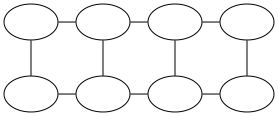

In [11]:
graph = Graph()
graph.node('R1', '')
graph.node('R2', '')
graph.node('R3', '')
graph.node('R4', '')
graph.node('C1', '')
graph.node('C2', '')
graph.node('C3', '')
graph.node('C4', '')
graph.edge('R1', 'R2', '', color="black")
graph.edge('R2', 'R3', '', color="black")
graph.edge('R3', 'R4', '', color="black")
graph.edge('C1', 'C2', '', color="black")
graph.edge('C2', 'C3', '', color="black")
graph.edge('C3', 'C4', '', color="black")
graph.edge('R1', 'C1', '', color="black")
graph.edge('R2', 'C2', '', color="black")
graph.edge('R3', 'C3', '', color="black")
graph.edge('R4', 'C4', '', color="black")
with graph.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('R1')
    same_rank.node('R2')
    same_rank.node('R3')
    same_rank.node('R4')
with graph.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('C1')
    same_rank.node('C2')
    same_rank.node('C3')
    same_rank.node('C4')
display(graph)

Here this might be a graph of houses, where each person only affects their neighbour.  

If links are sparse this network grows slowly, compared to the exponential growth of the normal-form game.

In order to compute the expected utility of a node you only need to look at it's neighbours, which means the computation is in polynomial time wrt. the maximum number of connections a node has.

There are many efficient algorithms for computing things on these graphs, particuarly connected to similar ideas in Bayesian networks. For instance, there is a message-passing algorithm called NashProp which can compute an $\epsilon$-Nash equilibrium in time polynomial in $1/\epsilon$ and the size of the representation.

### 6.5.3 Action-graph games

Another compression we can do is to the actions that each player can undertake. Sometimes actions may not have any impact on someone else. For instance, imagine instead of each node above being a house they were instead actions. E.g., the action to move to a particular house. Say people generally want to live around other people. Then the actor doesn't matter but the action does. We can convey that in a similar form. It also makes it easier to compute expected utility - we only need to look at the nodes connected to our action.

We can define a configuration as the summary of the important details here - how many people undertook each action. 

Obviously multiple action profiles might give the same configuration. We saw this structure looking at congestion games in the previous notebook. As before, this representation makes the utility function quick to calculate. 

Both graphical games and action-graph games are equally expressive and can also be employed to describe any normal-form game.

The polynomial time guarantee for action-graph games applies wrt the in-degree of the graph, similar to graphical games.

Action-graph games can be extended in a couple of interesting ways with 'function nodes' and made to exploit additivity in players' utility functions.

### 6.5.4 Multiagent influence diagrams

Multiagent influence diagrams (graphS) are a combination of graphical games and extensive-form games. They are perhaps best shown with a diagram:

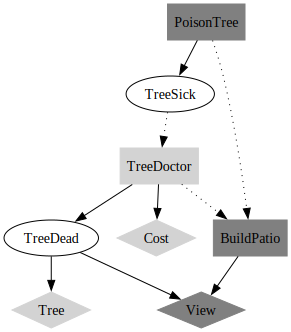

In [22]:
from graphviz import Digraph

graph = Digraph()

graph.node('PoisonTree','PoisonTree',shape='box', style='filled', color="grey")
graph.node('TreeSick', 'TreeSick', shape='ellipse')
graph.node('TreeDead', 'TreeDead', shape='ellipse')
graph.node('TreeDoctor', 'TreeDoctor', shape='box', style='filled', color="lightgrey")
graph.node('BuildPatio','BuildPatio',shape='box', style='filled', color="grey")
graph.node('Cost', 'Cost', shape='diamond', style='filled', color='lightgrey')
graph.node('Tree', 'Tree', shape='diamond', style='filled', color='lightgrey')
graph.node('View', 'View', shape='diamond', style='filled', color='grey')

graph.edge('PoisonTree', 'TreeSick')
graph.edge('PoisonTree', 'BuildPatio',style='dotted')
graph.edge('TreeSick', 'TreeDoctor',style='dotted')
graph.edge('TreeDoctor', 'BuildPatio',style='dotted')
graph.edge('TreeDoctor', 'TreeDead')
graph.edge('TreeDoctor', 'Cost')
graph.edge('TreeDead', 'Tree')
graph.edge('TreeDead', 'View')
graph.edge('BuildPatio', 'View')
display(graph)

Decisions are in the rectangular boxes, random nodes are ovals, and the utilities are diamonds. The arrows are dotted if the receiving node knows the status of the sending node, whereas the plain lines represent the chosen action (things which change the probabilities). Finally, the different actors are shown by the different colors. 

In this case the first decision is whether to poison the tree block the view of the dark grey character. The light grey character sees whether the tree is sick and decides whether to call the tree doctor, which carries a cost but might save the tree. Finally the dark grey character makes a decision whether to build the patio or not, knowing if the tree doctor visited.

Agents have a distribution over the actions they take at each node. 

If we had instead built this tree in the normal extended-form fashion it would have 5 layers and 32 leaf nodes.

In a similar fashion to backward-induction we can generally find equilibria faster in this form. We do this by checking whether the decision at one node is strategically relevant to the decision at another. For example, because BuildPatio sees both PoisonTree and TreeDoctor, we don't need to consider what any other actions are. We can just optimise what happens at that node given PoisonTree and TreeDoctor.

It turns out what computing expected utility in a MAID is polynomial in the size of the representation.

### 6.5.5 GALA

GALA is a programming language that helps someone describe a game. It has lots of built-in compressions, for things like turns, choosing, revealing, etc. Worth looking into!